In [1]:
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [2]:
data = load_iris()

In [3]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [4]:
X_train, X_test, y_train, y_test = train_test_split(data['data'],data['target'], test_size=0.3)

In [5]:
model.fit(X_train,y_train)

LogisticRegression()

In [6]:
model.predict(X_test)

array([0, 1, 2, 0, 2, 1, 2, 0, 2, 2, 2, 2, 1, 1, 0, 0, 1, 2, 1, 1, 1, 1,
       1, 0, 0, 2, 2, 1, 1, 1, 2, 1, 0, 0, 0, 1, 1, 0, 0, 2, 1, 0, 2, 2,
       1])

In [7]:
y_predicted = model.predict(X_test)
y_predicted

array([0, 1, 2, 0, 2, 1, 2, 0, 2, 2, 2, 2, 1, 1, 0, 0, 1, 2, 1, 1, 1, 1,
       1, 0, 0, 2, 2, 1, 1, 1, 2, 1, 0, 0, 0, 1, 1, 0, 0, 2, 1, 0, 2, 2,
       1])

In [8]:
model.score(X_test,y_test)

0.9555555555555556

In [9]:
data.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [10]:
classification_report(y_test, y_predicted, target_names=data['target_names'])

'              precision    recall  f1-score   support\n\n      setosa       1.00      1.00      1.00        13\n  versicolor       0.94      0.94      0.94        18\n   virginica       0.93      0.93      0.93        14\n\n    accuracy                           0.96        45\n   macro avg       0.96      0.96      0.96        45\nweighted avg       0.96      0.96      0.96        45\n'

In [11]:
cm = confusion_matrix(y_test, y_predicted)
cm

array([[13,  0,  0],
       [ 0, 17,  1],
       [ 0,  1, 13]], dtype=int64)

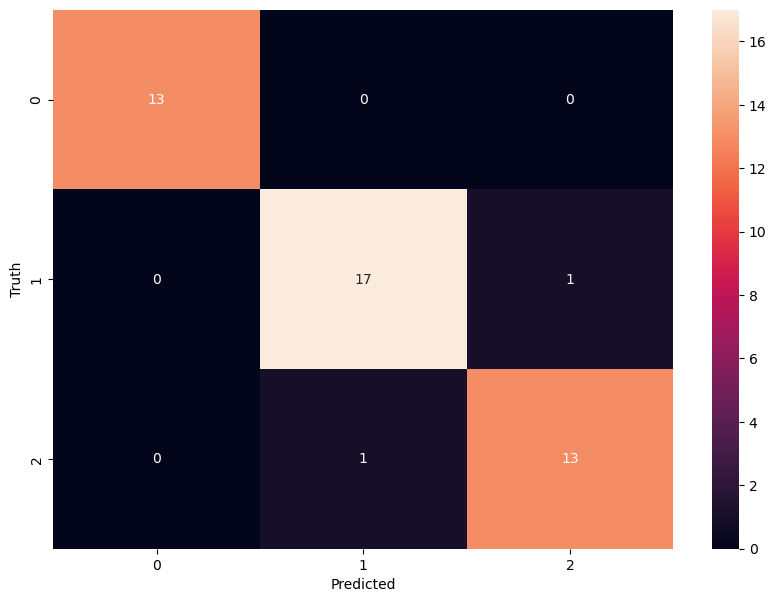

45

In [12]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()
len(X_test)

In [13]:
print("\nSample Predictions:")
for i in range(min(5, len(X_test))):
    sample = X_test[i].reshape(1, -1)
    prediction = model.predict(sample)[0]
    probabilities = model.predict_proba(sample)[0]
    
    print(f"Sample {i+1}:")
    print(f"  Features: Sepal Length={X_test[i][0]:.1f}, Sepal Width={X_test[i][1]:.1f}, "
          f"Petal Length={X_test[i][2]:.1f}, Petal Width={X_test[i][3]:.1f}")
    print(f"  Actual: {data.target_names[y_test[i]]}")
    print(f"  Predicted: {data.target_names[prediction]}")
    print(f"  Probability: {probabilities[prediction]:.4f}")
    print()


Sample Predictions:
Sample 1:
  Features: Sepal Length=5.4, Sepal Width=3.7, Petal Length=1.5, Petal Width=0.2
  Actual: setosa
  Predicted: setosa
  Probability: 0.9706

Sample 2:
  Features: Sepal Length=6.1, Sepal Width=2.8, Petal Length=4.7, Petal Width=1.2
  Actual: versicolor
  Predicted: versicolor
  Probability: 0.8207

Sample 3:
  Features: Sepal Length=5.9, Sepal Width=3.2, Petal Length=4.8, Petal Width=1.8
  Actual: versicolor
  Predicted: virginica
  Probability: 0.6087

Sample 4:
  Features: Sepal Length=4.9, Sepal Width=3.0, Petal Length=1.4, Petal Width=0.2
  Actual: setosa
  Predicted: setosa
  Probability: 0.9648

Sample 5:
  Features: Sepal Length=6.8, Sepal Width=3.0, Petal Length=5.5, Petal Width=2.1
  Actual: virginica
  Predicted: virginica
  Probability: 0.9158



In [14]:
model.score(X_test,y_test)

0.9555555555555556